In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
 
%matplotlib inline

np.random.seed(seed=42)

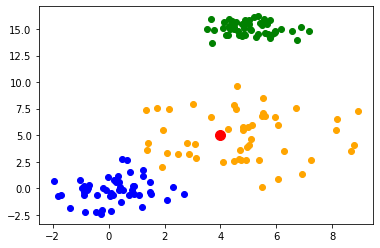

In [89]:
p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=10, scale=0.8, size=(50,2)) - np.array([5, -5])


X = np.concatenate((p1, p2, p3))
y = np.array([1]*50 + [2]*50 + [3]*50)

point = [4., 5.]

plt.scatter(p1[:,0], p1[:, 1], color='blue')
plt.scatter(p2[:,0], p2[:, 1], color='orange')
plt.scatter(p3[:,0], p3[:, 1], color='green')
plt.scatter(point[0], point[1], s = 100, color='red')

In [3]:
# евклидова метрика, возвращает массив из 1 числа - расстояния (можно исправить на число, убрав "axis" из np.sum)
def euclidian_metric(a, b):
    square = np.square(a-b)
    sum_squ = np.sum(square,axis=1)
    return np.sqrt(sum_squ)

a = np.zeros((1,4))
b = np.ones((1,4))

assert euclidian_metric(a,b)[0] == 2
print('ошибок нет')

ошибок нет


In [4]:
# функция, находящая ближайших k соседей и расстояния до них (k-количество соседей, y-точки, distances-расстояния до точек y)
def find_neighbours(k, y, distances):
    sorted_dist = np.argsort(distances)
    neighbours = y[sorted_dist[:k]]
    neighbours_distances = distances[sorted_dist[:k]]
    return neighbours, neighbours_distances

In [5]:
# функция, выделяющая преобладающий класс среди соседей (на вход подаются классы соседей)
def get_closest_classes(neighbours):
    values, counts = np.unique(neighbours, return_counts=True)
    best_classes=values[np.where(counts==counts.max())[0]]
    return best_classes

In [57]:
# функция, определяющая лучший класс по минимальному среднему расстоянию до объектов 
def choose_best_class(best_classes, neighbours, neighbouring_distances):
    min_mean_dist = np.inf
    best_class = best_classes[0]
    neighbours_new=neighbours[np.argsort(neighbours)]
    neighbouring_distances_new=neighbouring_distances[np.argsort(neighbours)]
    counter=0
    counter_value=0
    value_i=neighbours_new[0]
    for i in range(neighbours.shape[0]):
        if neighbours_new[i] in best_classes:
            if neighbours_new[i]==value_i:
                counter+=1
                counter_value+=neighbouring_distances_new[i]
            else:
                if counter:
                    if (counter_value/counter)<min_mean_dist:
                        min_mean_dist=counter_value/counter
                        best_class=value_i
                value_i=neighbours_new[i]
                counter=1
                counter_value=neighbouring_distances_new[i]
    return best_class

In [74]:
# функция, считающая расстояния каждой точки элемента выборки x_pred до всех точек 
# в исходном датасете X, и на основе расстояний вычисляющая принадлежность к классу

def nearest_neighbours_classify(x, y, k, x_pred):
    res = np.zeros(x_pred.shape[0], dtype=y.dtype)

    for g in range(x_pred.shape[0]):
        distances = euclidian_metric(x, x_pred[g])  # считаем расстояния до классов

        neighbours, neighbouring_distances = find_neighbours(k, y, distances)  # находим ровно k соседей этой точки
            
        best_classes = get_closest_classes(neighbours)  # обнаруживаем классы, которые имеются среди соседей
        
        res[g] = choose_best_class(best_classes, neighbours, neighbouring_distances)  # выбираем наиболее релевантный класс по среднему расстоянию до него среди соседей
    return res

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_test_split разбивает X и y на выборки при этом размер тестовой выборки устанавливается через test_size  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# выберем число соседей =  5
# для данных из тестовой выборки предскажем, к какому классу относятся точки
y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

#а теперь сравним предсказанное значение с реальным и выведем значение, показывающее процент верно классифицированных
#(значение будет от 0 до 1 - от 0 до 100 процентов соответственно)
print(accuracy_score(y_test, y_pred))

1.0


In [90]:
point = np.array([4., 5.5]) # изначально точка добавлялась на график как список, но мы работает с numpy массивами
nearest_neighbours_classify(X_train, y_train, 5, point)[0]

2

In [91]:
from sklearn import datasets

# загружаем датасет с цифрами
# В Х загрузим картинки с цифрами, по Х предсказываем класс
# В y хранится значение целевого признака, что мы должны предсказать в итоге. 
X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

Экземпляров: 1797
Размер изображения: 8.0x8.0


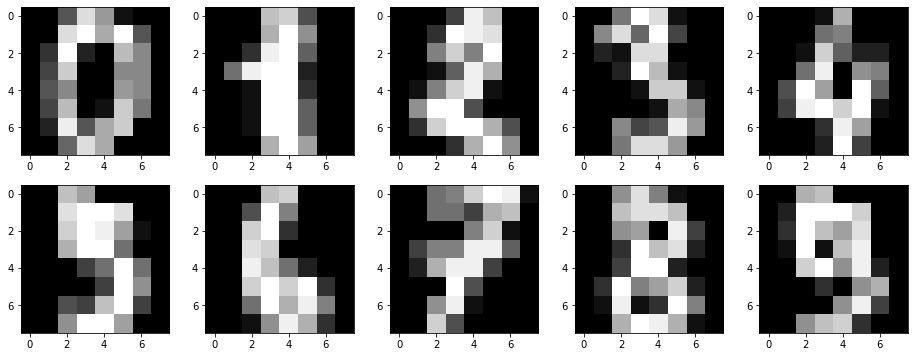

In [92]:
# выведем пример содержимого датасета с помощью кода ниже(10 цифр)
# Для начала зафиксируем размер итоговой фигуры(на нее будем добавлять изображения с цифрами)
plt.figure(figsize=(16, 6))
width = int(np.sqrt(X.shape[1]))
# Затем в цикле будем добавлять изображения на фигуру, используя функцию subplot, 
# она нужна для добавления независимых графиков\изображений на одной ячейке
# первое значение в subplot обозначает число строк, второе - число столбцов,
# то есть так можно добавить на график 5 в каждую строку, всего 2 строки
# Третье значение отвечает за текущую позицию(нумерация с 1), например, если позиция 6, то картинка добавится в первый столбец второго ряда(для текущих значений) 
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([width,width]), cmap='gray')

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

print(accuracy_score(y_test, y_pred))

0.9861111111111112
